<a href="https://colab.research.google.com/github/Hitaishree1/Hitaishree1/blob/main/Flight_booking_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("/content/Flight_Booking.csv")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [14]:
data=data.drop(['Unnamed: 0'],axis=1)

In [17]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [18]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [20]:
import seaborn as sns

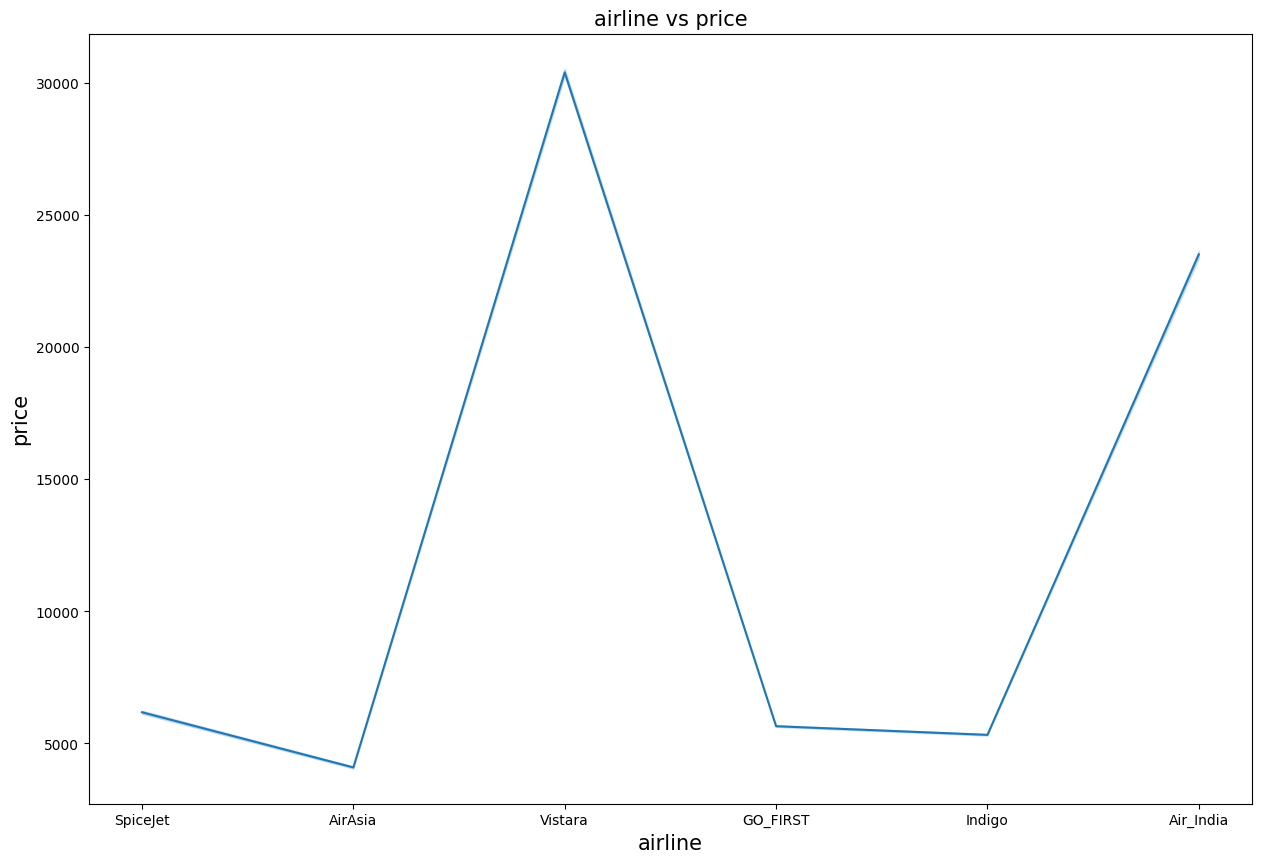

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data['airline'],y=data['price'])
plt.title('airline vs price', fontsize=15)
plt.xlabel('airline',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

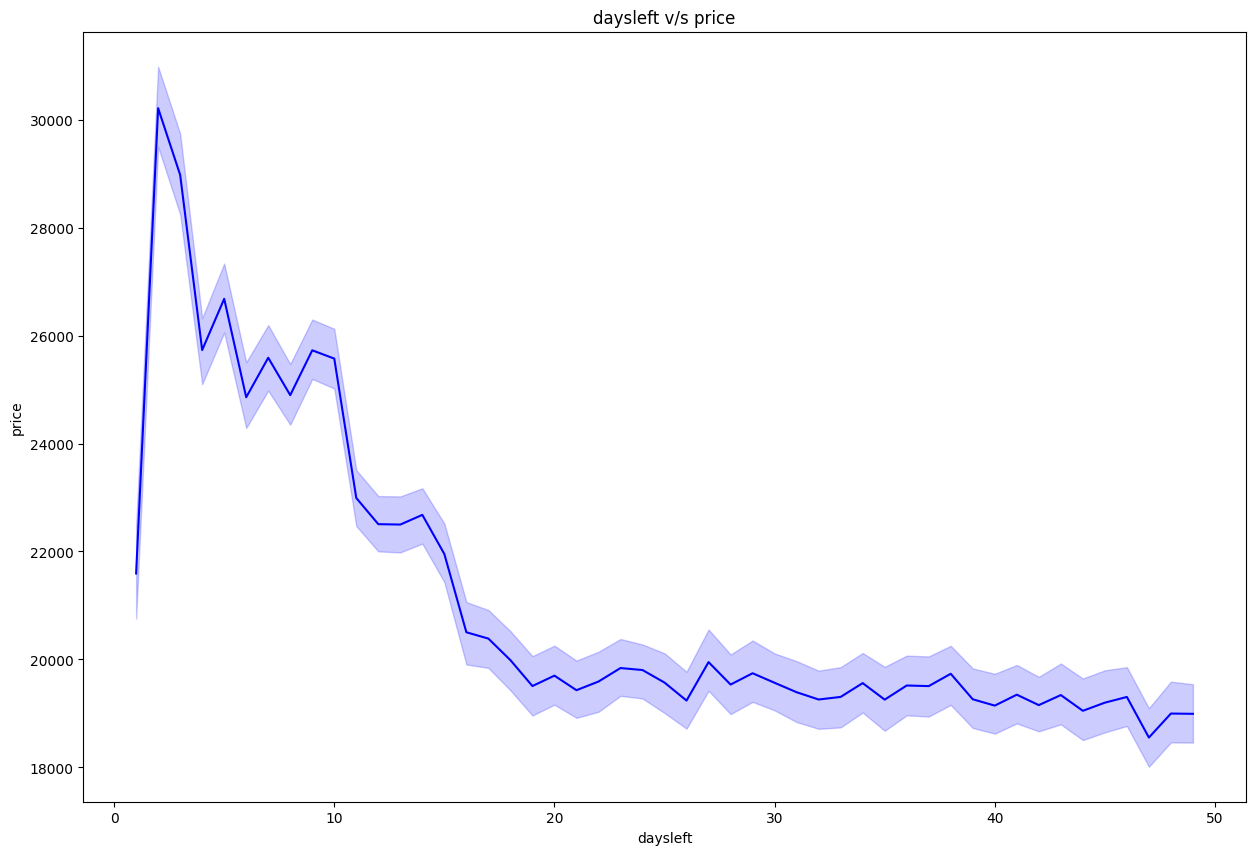

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data['days_left'],y=data['price'],color='blue')
plt.title('daysleft v/s price')
plt.xlabel('daysleft')
plt.ylabel('price')
plt.show()

<Axes: xlabel='airline', ylabel='price'>

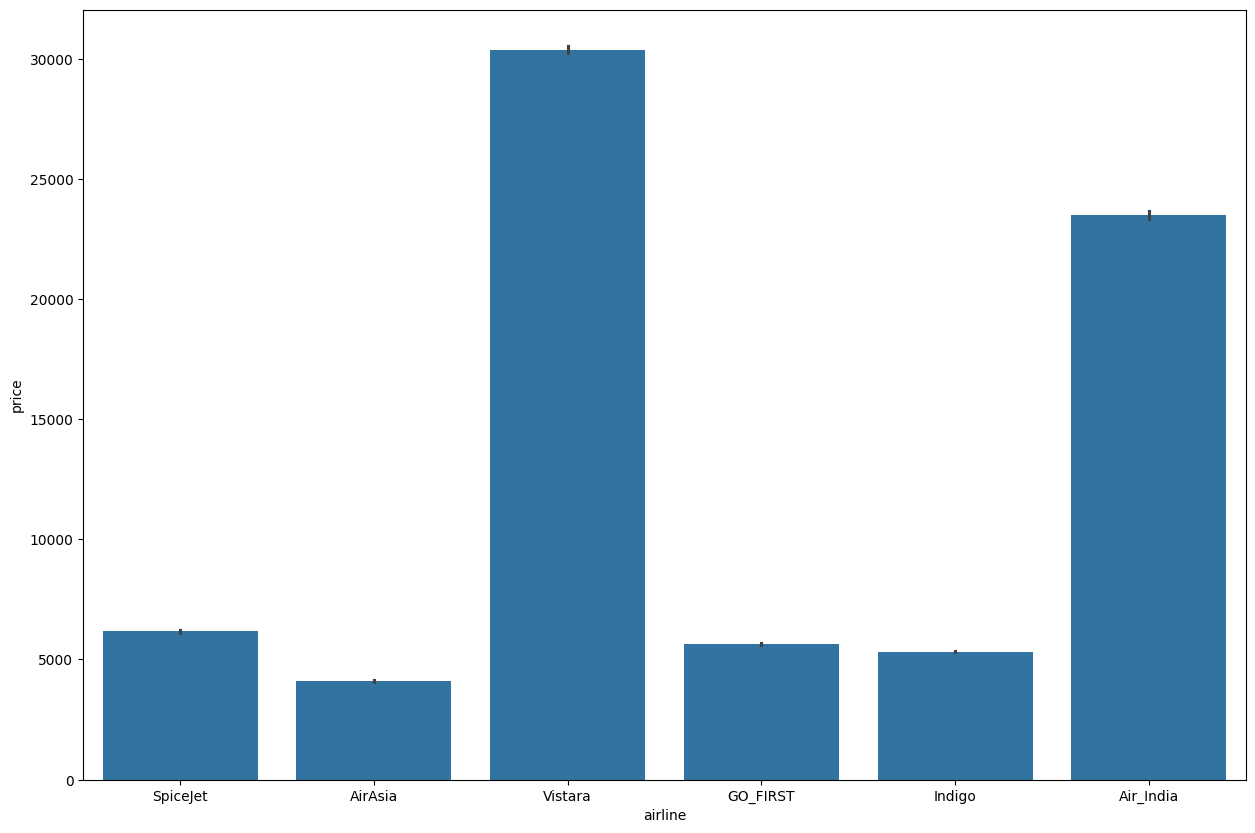

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='airline',y='price',data=data)

<Axes: xlabel='class', ylabel='price'>

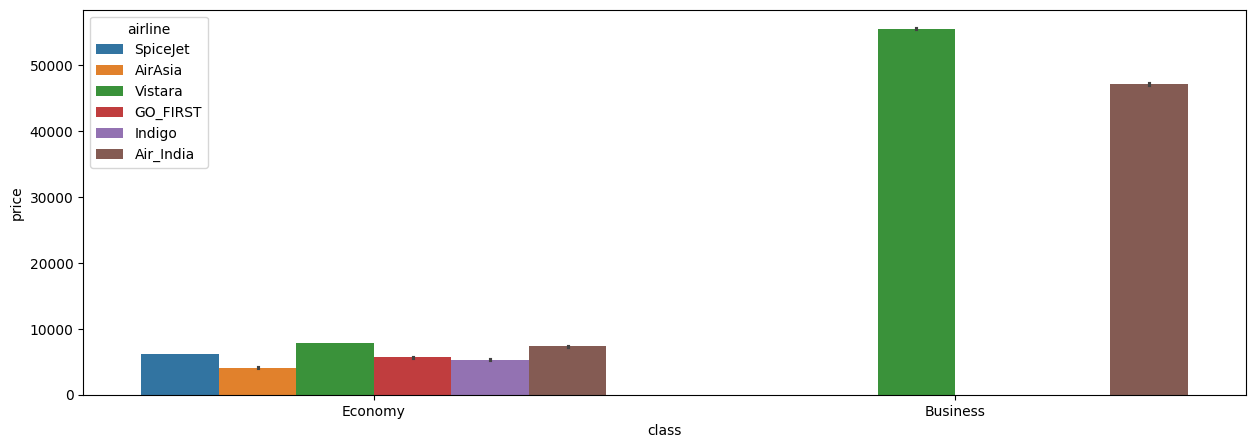

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='class',y='price',hue='airline')

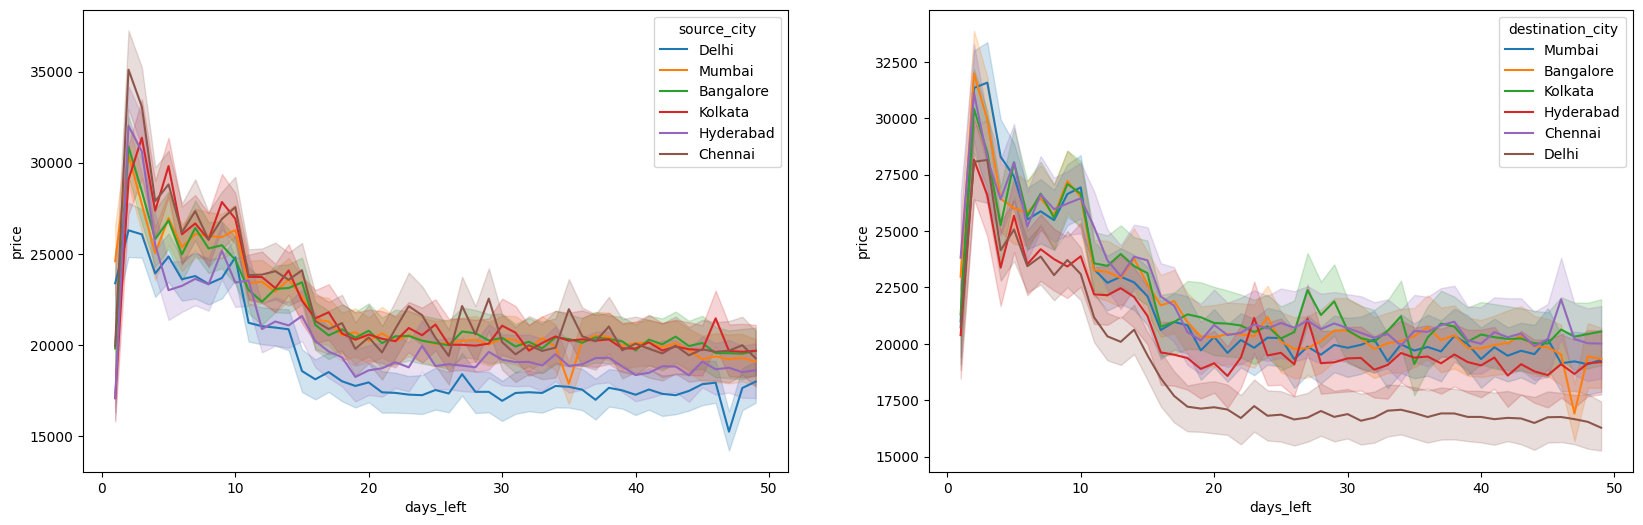

In [29]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=data,x='days_left',y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=data,x='days_left',y='price',hue='destination_city',ax=ax[1])
plt.show()

In [27]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

Text(0.5, 1.0, 'arrival_time_freq')

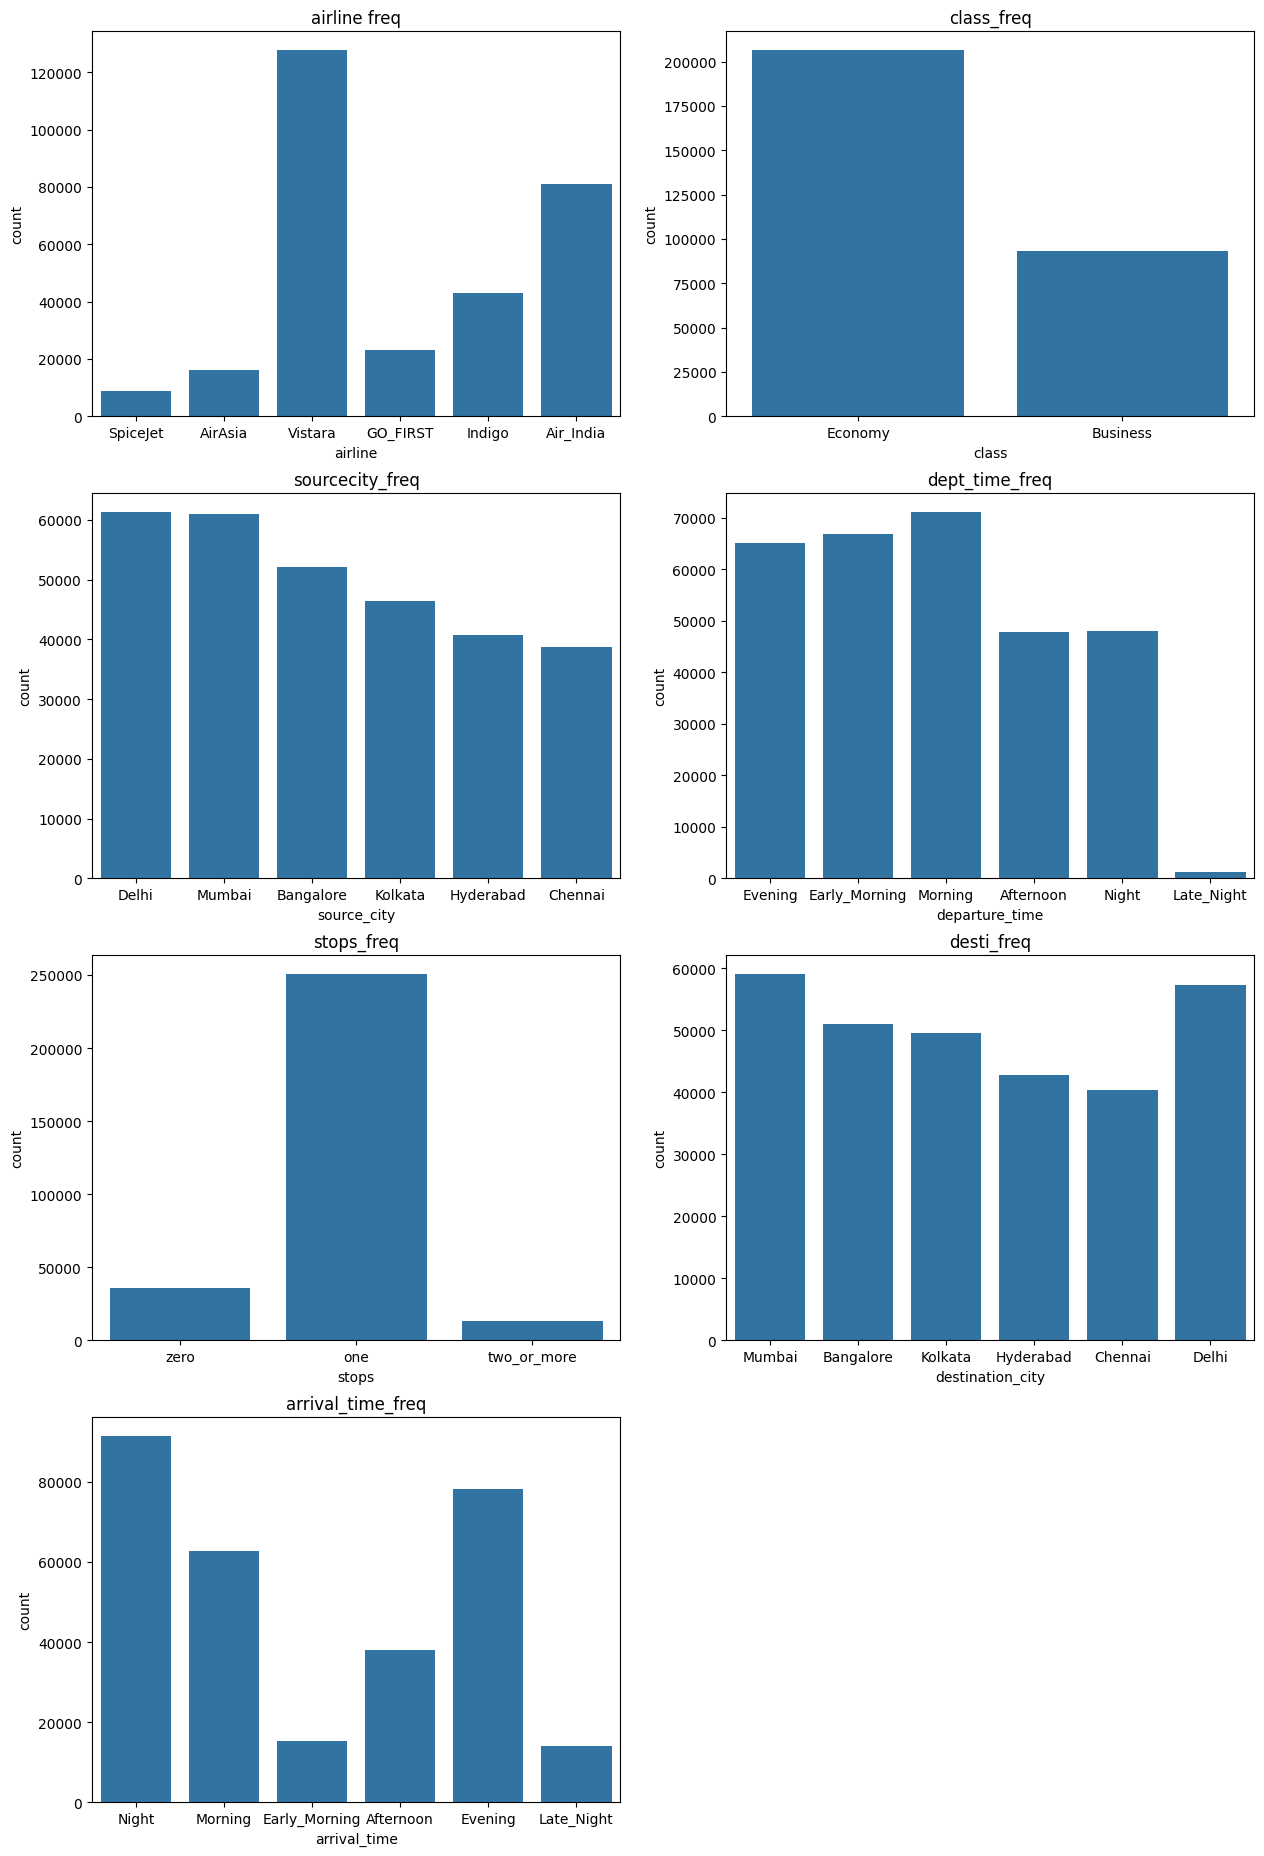

In [30]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=data['airline'],data=data)
plt.title('airline freq')

plt.subplot(4,2,2)
sns.countplot(x=data['class'],data=data)
plt.title('class_freq')

plt.subplot(4,2,3)
sns.countplot(x=data['source_city'],data=data)
plt.title('sourcecity_freq')

plt.subplot(4,2,4)
sns.countplot(x=data['departure_time'],data=data)
plt.title('dept_time_freq')

plt.subplot(4,2,5)
sns.countplot(x=data['stops'],data=data)
plt.title('stops_freq')

plt.subplot(4,2,6)
sns.countplot(x=data['destination_city'],data=data)
plt.title('desti_freq')

plt.subplot(4,2,7)
sns.countplot(x=data['arrival_time'],data=data)
plt.title('arrival_time_freq')

In [31]:
from sklearn.preprocessing import LabelEncoder


In [32]:
le=LabelEncoder()

In [33]:
for cols in data.columns:
  if data[cols].dtypes =='object':
    data[cols]=le.fit_transform(data[cols])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


<Axes: >

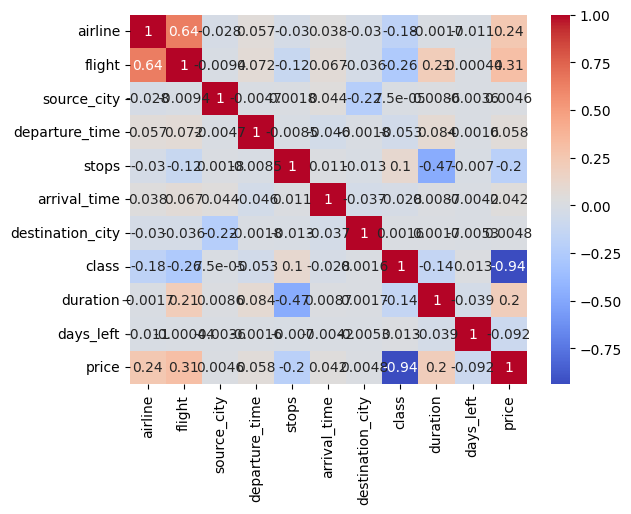

In [35]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
col_list=[]
for col in data.columns:
  if ((data[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
print(vif_data)

            feature        vif
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [38]:
data=data.drop(columns=['flight'])

In [ ]:
in

In [39]:
col_list=[]
for col in data.columns:
  if ((data[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['vif']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
print(vif_data)

            feature       vif
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [40]:
x=data.drop(columns=['price'])
y=data['price']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [44]:
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=lr.predict(x_test)

In [50]:
diff=pd.DataFrame(np.c_[y_test,y_pred],columns=['actual','pred'])
diff

,actual,pred
0,10721.0,13027.077157
1,66928.0,51379.152787
2,6909.0,254.608768
3,2271.0,-2943.718624
4,4363.0,5995.634500
...,...,...
60026,6461.0,7687.823353
60027,49207.0,57140.704140
60028,20291.0,8701.236009
60029,18281.0,8759.045861


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9052362375016471

In [52]:
from sklearn import metrics

In [54]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4614.085748708873

In [56]:
from sklearn.metrics import mean_absolute_percentage_error

In [57]:
mean_absolute_percentage_error(y_test,y_pred)

0.43909536797426835

In [59]:
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

48454460.72743338

In [62]:
root_mean_sq_error=np.sqrt(mean_sq_error)
root_mean_sq_error

6960.923841519413

<ipython-input-63-b3c66ce39c82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='actual')
<ipython-input-63-b3c66ce39c82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='pred')


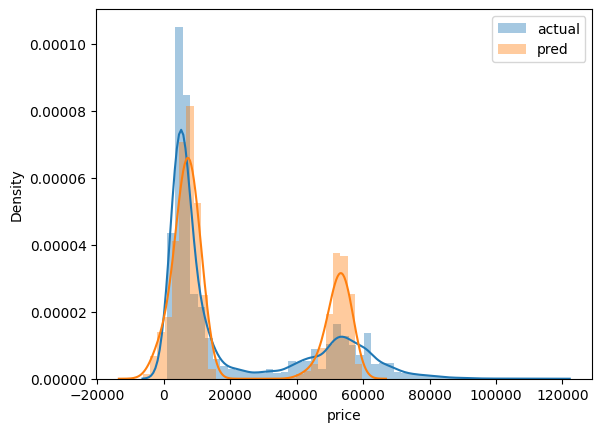

In [63]:
sns.distplot(y_test,label='actual')
sns.distplot(y_pred,label='pred')
plt.legend()

In [65]:
from sklearn.tree import DecisionTreeRegressor
df=DecisionTreeRegressor()
df.fit(x_train,y_train)
y_pred=df.predict(x_test)
print(r2_score(y_test,y_pred))
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)
print(mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)
root_mean_sq_error=np.sqrt(mean_sq_error)
print(root_mean_sq_error)

0.9766655651173874
1159.7331545368227
0.07519471190385676
11931327.21630861
3454.1753308580924


In [67]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(r2_score(y_test,y_pred))
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)
print(mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)
root_mean_sq_error=np.sqrt(mean_sq_error)
print(root_mean_sq_error)

0.9854000513502316
1077.796809299124
0.07112330387504115
7465223.201590855
2732.2560644256705
